# Readability - indici sviluppati da studi linguistici

LEGGERE: fare attenzione alle parti commentate di questo codice!!!
il codice fa cose diverse a seconda delle celle che selezionate!!

In [1]:
from readability import Readability
import spacy
import nltk
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import re
import nltk
import csv
from collections import Counter
from readability import exceptions
from lexicalrichness import LexicalRichness

In [19]:

path= r"/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI" 
# folder dove si hanno i sottotitoli

matrix=[]


output_file='text_analysis_readability_new_subtitles.csv'
header=['Title','House', 'Decade', 'Year', 'Category', 'Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl','ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl','linsear_write_score', 'linsear_write_gl', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd']


with open (output_file, 'w', encoding='utf-8', newline='\n') as output_handle:
    my_writer= csv.writer(output_handle, delimiter=';', quotechar='"')
    my_writer.writerow(header)

    for dirpath, dirnames, files in os.walk(path):
        print(f'Found directory: {dirpath}')
        for file in files:
            if file[0] == '.':
                continue
            with open(dirpath+ "/" + file, 'r', encoding='Latin-1') as f:
                try:
                    text=f.read()
                    r = Readability(text)

                    fk = r.flesch_kincaid()
                    Flesch_Kincaid_score = fk.score
                    Flesch_Kincaid_gl = fk.grade_level

                    f = r.flesch()
                    flesch_score =(f.score)
                    flesch_reading_ease=(f.ease)
                    for i in f.grade_levels:   
                        flesch_gl = str(i[0])

                    dc = r.dale_chall()
                    dale_chall_score =(dc.score)
                    for k in dc.grade_levels:
                        dale_chall_gl =str(k)

                    ari = r.ari()
                    ari_score =ari.score
                    for y in ari.grade_levels:
                        ari_gl =str(y)
                    for t in ari.ages:
                        ari_ages=str(t)

                    cl = r.coleman_liau()
                    coleman_liau_score = (cl.score)
                    coleman_liau_gl = (cl.grade_level)

                    s = r.smog(all_sentences=True)
                    smog_score =(s.score)
                    smog_gl = (s.grade_level)

                    s = r.spache()
                    spache_score = (s.score)
                    spache_gl =s.grade_level

                    lw = r.linsear_write()
                    linsear_write_score = (lw.score)
                    linsear_write_gl = (lw.grade_level)
                    
                    # lexical richness
                    
                    lex = LexicalRichness(text)
                    ttr=lex.ttr
                    num_words=lex.words
                    num_terms=lex.terms
                    rttr=lex.rttr
                    cttr=lex.cttr
                    mltd=lex.mtld(threshold=0.72)

                    print('file ok: {}'.format(dirpath + "/" + file))
                    for i in flesch_gl:
                        flesch_gl = str(i)


                    x=dirpath.split('/')
                    print(x)
                    decade=x[-1]

                    if x[8]== 'Disney':
                        house=x[8]
                        category=x[9]
                    else:
                        house=x[8]
                        category='Animation'
                    

                

                    s=file.split('.')
                    title=s[0]
                    year=s[1]

                    row=[title, house, decade, year, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl, ttr, num_words, num_terms, rttr, cttr, mltd]
                                            
                                    
                    list_indices = [title, year, decade, house, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl, num_words, num_terms, rttr, cttr, mltd]

                    matrix.append(list_indices)

                    my_writer.writerow(row)
                    
                except (exceptions.ReadabilityException):
                    print('\n\n\n!!!!!!File con problemi!!!!! {} \n\n\n'.format(title))
                    pass
                    




Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Ice Age Dawn of the Dinosaurs.2009.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Blue', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Horton Hears a Who.2008.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Blue', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Ice Age 2-The Meltdown.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANA

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time IV-Journey Through the Mists.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time V-The Mysterious Island.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time VI-The Secret of Saurus Rock.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time II-The Great Valley Adventu

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Puss in Boots 3D.2011.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Rise of the Guardians.2012.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/The Croods.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Penguins Of Madagascar.2014.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', '

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Whisper of the Heart.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Pom Poko.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Princess Mononoke.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/The Ocean Waves.1993.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOL

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Lilo And Stitch.2002.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Monsters Inc.2001.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Meet the Robinsons.2007.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/The Emperors New Groove.2000.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Frozen 2.2019.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Toy Story 3.2010.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Monsters University.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Incredibles 2.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'AN

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/The Rescuers Down Under.1990.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/The Hunchback of Notre Dame.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/A Bug's Life.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/Toy Story.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/The Gnome-Mobile.1967.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/The Moon-Spinners.1964.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/The Love Bug.1968.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/Pollyanna.1960.txt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/In Search of the Castaways.1962.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/Multiply That Darn Cat.1965.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1950
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1950/The Shaggy Dog.1959.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1950']
file ok: /Users/valeriaguttilla/Desktop/MASTER/P

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Shaggy Dog.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Chronicles Of Narnia-The Lion The Witch And The Wardrobe.2005.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Princess Diaries 2 Royal Engagement.2004.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/Eight

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/The Finest Hours.2016.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/Timmy Failure Mistakes Were Made.2020.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/A Wrinkle in Time.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/Christopher Robin.2018.srt
['', 'Users', 'valeriagutt

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/Napoleon and Samantha.1972.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/The Cat From Outer Space.1978.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/Shaggy DA.1976.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/No Deposit No Return.1976.srt
['', 'Users', 'valeriaguttilla', '

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Air Bud.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/The Big Green.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Heavyweights.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/The Muppet Christmas Carol.1992.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTE

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Cool Runnings.1993.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/White Fang.1991.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Iron Will.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/D3 The Mighty Ducks.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PR

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Warner/2010/Storks.2016.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Warner', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Warner/2010/The Lego Ninjago Movie.2017.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Warner', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Warner/2010/Smallfoot.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Warner', '2010']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Warner/1990
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Warner/1990/Batman-Mask of The Phantasm.1993.srt
['', 'Users', 'valeriaguttilla

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2010/Hotel Transylvania.2012.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Sony', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2010/Goosebumps.2015.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Sony', '2010']


In [20]:
# da fare solo se non si legge direttamente il csv, ma lo si è generato sopra
df = pd.DataFrame(np.array(matrix),
                   columns=['Title', 'Year','Decade','House','Category','Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl',
                       'ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl',
                                     'linsear_write_score', 'linsear_write_gl', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd'])
df

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,Flesch_Kincaid_gl,flesch_score,flesch_reading_ease,flesch_gl,...,smog_gl,spache_score,spache_gl,linsear_write_score,linsear_write_gl,num_words,num_terms,rttr,cttr,mltd
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,1.0660601317267826,1,95.51359115169465,very_easy,5,...,6,4.205510489964961,4,1.570692883895131,2,5179,1031,14.326355040109718,10.130262798547655,70.15795008733038
1,Horton Hears a Who,2008,2000,Blue,Animation,1.6226931933889297,2,92.21287225811797,very_easy,5,...,6,4.415880730859719,4,1.8832882273342353,2,7394,1425,16.572008265109854,11.718179422138691,61.11161202185792
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,1.1331306717734897,1,95.52277798952919,very_easy,5,...,6,3.990931913153014,4,1.7218934911242605,2,5240,1037,14.325609641584313,10.129735722195655,62.31714480009267
3,Ice Age,2002,2000,Blue,Animation,0.857777548033166,1,97.41357988650391,very_easy,5,...,6,4.080606565987409,4,1.665727170236753,2,4472,965,14.430335084879223,10.203787793312252,75.38871750621063
4,Epic,2013,2010,Blue,Animation,1.0792746771336397,1,96.9378101391431,very_easy,5,...,6,3.984298367475945,4,2.038975501113586,2,7689,1244,14.186832785245793,10.031605666006936,74.29000407878891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,1.3208378543471042,1,93.69934532360237,very_easy,5,...,6,4.206686449816768,4,1.6118130132659507,2,7574,1267,14.558410619919625,10.294350872643417,79.41556873078612
441,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,1.7075463333441832,2,91.61577256846046,very_easy,5,...,6,4.146189226803024,4,1.9167374681393374,2,6053,1132,14.54993623039659,10.288358574345262,60.40384685730285
442,The Smurfs 2,2013,2010,Sony,Animation,1.6654665280077516,2,91.1480073556461,very_easy,5,...,6,4.054872998297901,4,1.6145374449339207,2,10771,1644,15.840679250466035,11.201051716605571,67.38144165559348
443,Hotel Transylvania,2012,2010,Sony,Animation,1.2142194151190289,1,94.95983903336234,very_easy,5,...,6,4.0292073163689555,4,1.762561274509804,2,8150,1354,14.998224843835942,10.605346492836942,67.89627901704628


In [48]:
# leggendo solo il cvs generato in precedenza 
df=pd.read_csv('readability_valeria_lex_ric2.csv', delimiter=',', quotechar='"')

In [21]:
# ricodifico gli indici stringhe in numerici

# c stava per college e saltando il numero 9 ho convertito il 9 in 8 e il college in 9
df['flesch_gl'].replace(to_replace=['c', '9'], value=[9,8], inplace=True )

df['flesch_reading_ease'].replace(to_replace=['very_easy', 'easy', 'fairly_easy', 'very_confusing', 'standard'], 
                                       value=[0,1,2,4,3], inplace=True)

# K stava per kindergarden
df['ari_gl'].replace(to_replace='K', value=0, inplace=True)

df['dale_chall_gl'].replace(to_replace=['college', 'college_graduate'], value=[13,14], inplace=True)

In [22]:
for columns in df.columns:
    if columns not in ['Title', 'House', 'Category']:
        print (columns)
        df[columns] = pd.to_numeric(df[columns])

Year
Decade
Flesch_Kincaid_score
Flesch_Kincaid_gl
flesch_score
flesch_reading_ease
flesch_gl
dale_chall_score
dale_chall_gl
ari_score
ari_gl
ari_ages
coleman_liau_score
coleman_liau_gl
smog_score
smog_gl
spache_score
spache_gl
linsear_write_score
linsear_write_gl
num_words
num_terms
rttr
cttr
mltd


In [ ]:
# seleziono una casa di produzione se voglio

df_selected = df[df['House']=='DISNEY']
# nel caso Disney con più categorie
df_selected = df_selected[df_selected['Category']=='Live Action']
df_selected

In [23]:
# usare df al posto di df_selected se non si è applicato un filtro, ma si è selezionato tutto
# separo le colonne di grade_levels dagli score

grade_levels_df=df[['Title','Year','Decade','House','Category','Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl']]
scores_df=df[['Title','Year','Decade', 'House','Category','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']]
lexical_r=df[['Title','Year','Decade','House','Category','num_words', 'num_terms', 'rttr', 'cttr', 'mltd']]

Analisi sugli score

In [ ]:
grade_levels_df

In [24]:
# normalizzazione (scaling)
min_max_scaler = MinMaxScaler()
scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']] = min_max_scaler.fit_transform(scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']])
scores_df

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.122909,0.783720,0.329022,0.190357,0.201864,0.259379,0.128264,0.049775
1,Horton Hears a Who,2008,2000,Blue,Animation,0.180330,0.689940,0.554884,0.242509,0.216345,0.305688,0.234235,0.073756
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.129828,0.783981,0.280480,0.137162,0.207780,0.286177,0.136621,0.061375
3,Ice Age,2002,2000,Blue,Animation,0.101423,0.837702,0.301784,0.159393,0.179314,0.238608,0.101784,0.057066
4,Epic,2013,2010,Blue,Animation,0.124273,0.824184,0.248659,0.135518,0.201021,0.300575,0.153287,0.085700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,0.149192,0.732174,0.374200,0.190649,0.190468,0.241904,0.166800,0.052930
441,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,0.189084,0.672975,0.378913,0.175651,0.223097,0.316655,0.259672,0.076322
442,The Smurfs 2,2013,2010,Sony,Animation,0.184743,0.659685,0.345941,0.153014,0.241590,0.319247,0.192038,0.053139
443,Hotel Transylvania,2012,2010,Sony,Animation,0.138193,0.767987,0.378411,0.146651,0.188251,0.255964,0.172330,0.064494


In [25]:
min_max_scaler = MinMaxScaler()
lexical_r[['num_words', 'num_terms', 'rttr', 'cttr', 'mltd']] = min_max_scaler.fit_transform(lexical_r[['num_words', 'num_terms', 'rttr', 'cttr', 'mltd']])

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
# se si vuole ottenere un df con i grade_levels non normalizzati e gli score normalizzati

df_final= scores_df.merge(grade_levels_df, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)
df_final = df_final.merge(lexical_r, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)

In [28]:
# nel caso si voglia generare un csv 

df_final.to_csv('/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/COMPLESSITA/readability_complexity_definitivo.csv')

In [27]:
# raggruppo per anno oppure per decade, a seconda di quello che voglio vedere

mean_score = scores_df.groupby('Decade').mean()
#mean_score = scores_df.groupby('Year').mean()

mean_score

,Year,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
Decade,,,,,,,,,
1930,1937.000000,0.093021,0.881488,0.174696,0.155568,0.202877,0.300587,0.058565,0.075795
1940,1943.818182,0.325171,0.543751,0.454685,0.312907,0.381402,0.538729,0.368017,0.202588
1950,1955.000000,0.203663,0.715930,0.275323,0.187458,0.282181,0.431494,0.214732,0.129584
1960,1963.825000,0.223575,0.677899,0.305075,0.190720,0.290223,0.444656,0.274008,0.136137
1970,1975.037037,0.187329,0.710758,0.329173,0.190944,0.256747,0.389853,0.231833,0.101197
1980,1984.321429,0.223479,0.698506,0.358718,0.225715,0.282099,0.369813,0.254057,0.157656
1990,1995.204819,0.169389,0.735576,0.354034,0.194132,0.239242,0.346918,0.208190,0.091275
2000,2004.193878,0.167577,0.741569,0.339036,0.181274,0.236416,0.335264,0.201088,0.093602
2010,2014.618056,0.165152,0.737011,0.320572,0.163096,0.231604,0.330356,0.200737,0.084825


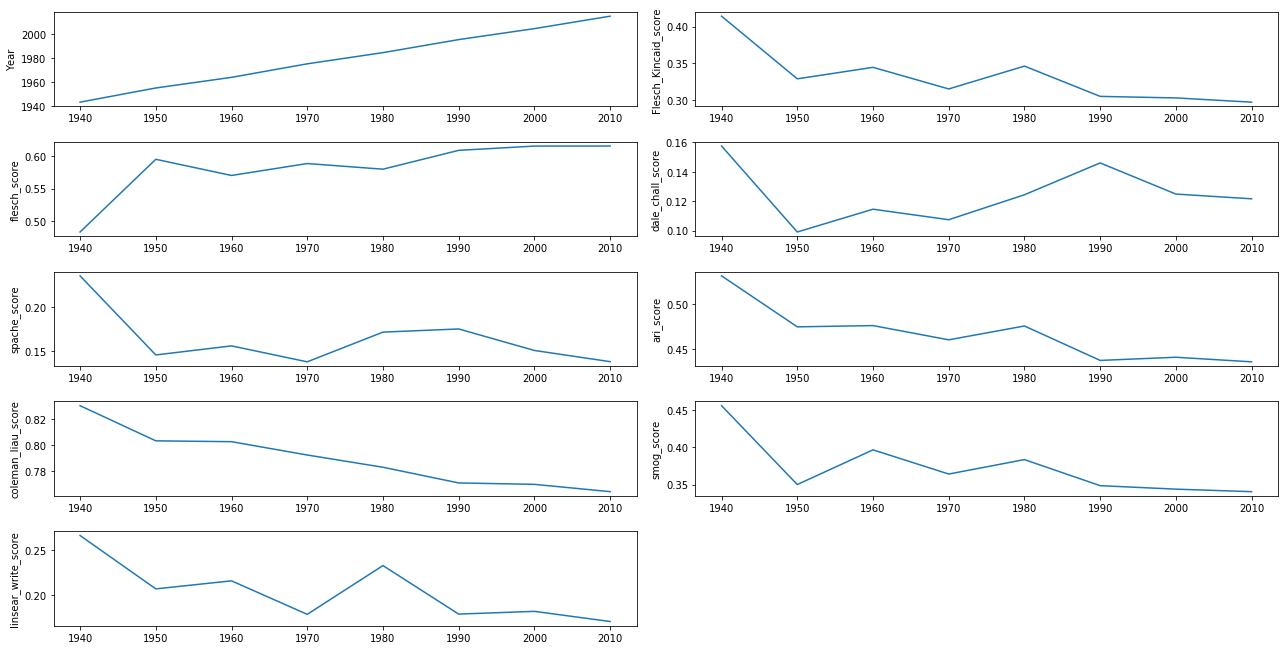

In [24]:
# plot degli score 

plt.figure(figsize=(18, 18)) 
# selezionare le dimensioni a seconda di quanti grafici si hanno
fig_dims = (10, 2)
i = 0
j = 0
for c in mean_score:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(mean_score[(str(c))])
    plt.ylabel(str(c))

        # j deve essere il numero delle dimensioni fig_dims(x,y) di y-1 
    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10



Analisi grade levels

In [25]:
# raggruppo per anno o per decade (come fatto per gli scores)

#grade_levels_df= grade_levels_df.groupby('Year').mean()
grade_levels_df= grade_levels_df.groupby('Decade').mean()
grade_levels_df

,Year,Flesch_Kincaid_gl,flesch_gl,dale_chall_gl,spache_gl,ari_gl,coleman_liau_gl,smog_gl,linsear_write_gl
Decade,,,,,,,,,
1940,1943.250000,2.916667,5.666667,10.416667,4.750000,1.750000,3.250000,6.916667,3.666667
1950,1955.000000,1.846154,5.230769,9.076923,4.076923,0.692308,2.615385,6.153846,2.692308
1960,1963.825000,2.025000,5.225000,9.500000,4.300000,0.350000,2.525000,6.525000,2.775000
1970,1975.037037,1.666667,5.148148,9.481481,4.111111,0.074074,2.296296,6.222222,2.222222
1980,1984.321429,1.964286,5.464286,9.571429,4.357143,0.857143,2.000000,6.464286,3.035714
1990,1995.139241,1.481013,5.278481,10.063291,4.405063,0.177215,1.582278,6.189873,2.329114
2000,2004.239583,1.562500,5.208333,9.854167,4.260417,0.250000,1.552083,6.218750,2.354167
2010,2014.562044,1.489051,5.197080,9.598540,4.211679,0.182482,1.335766,6.131387,2.182482


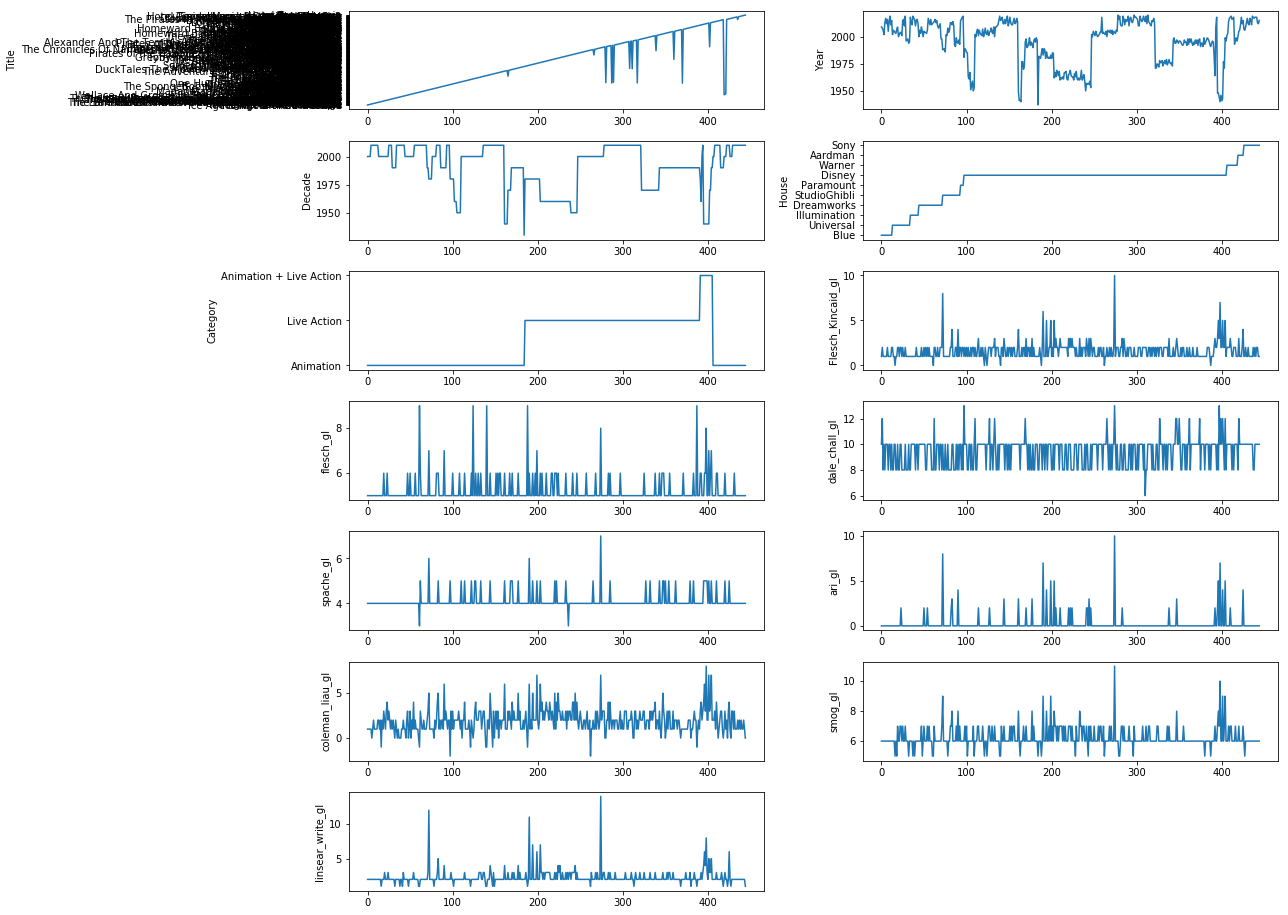

In [30]:
# plots for grade levels. Note: not normalized (non ha senso normalizzarli!)

plt.figure(figsize=(18, 18)) 
fig_dims = (10, 2)
i = 0
j = 0
for c in grade_levels_df.columns:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(grade_levels_df[(str(c))])
    plt.ylabel(str(c))

    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10

In [27]:
# raggruppo per anno o per decade (come fatto per gli scores)

lex_rich_df= lexical_r.groupby('Year').mean()
#lex_rich_df= lexical_r.groupby('Decade').mean()
lex_rich_df

,Decade,num_words,num_terms,rttr,cttr,mltd
Year,,,,,,
1937,1940.000000,0.230241,0.360307,0.610133,0.610133,0.270782
1940,1940.000000,0.222320,0.370954,0.697523,0.697523,0.588194
1941,1940.000000,0.161907,0.293015,0.587524,0.587524,0.301868
1942,1940.000000,0.106064,0.188671,0.442418,0.442418,0.236408
1943,1940.000000,0.152737,0.459114,0.999601,0.999601,0.761716
...,...,...,...,...,...,...
2016,2010.000000,0.423628,0.490179,0.616703,0.616703,0.489926
2017,2010.000000,0.476400,0.569111,0.684541,0.684541,0.510576
2018,2009.285714,0.491049,0.579551,0.688610,0.688610,0.578802


In [29]:
# plots for grade levels. Note: not normalized (non ha senso normalizzarli!)

plt.figure(figsize=(18, 18)) 
fig_dims = (10, 2)
i = 0
j = 0
for c in lex_rich_df.columns:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(lex_rich_df[(str(c))])
    plt.ylabel(str(c))

    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10

NameError: name 'lex_rich_df' is not defined

<Figure size 1296x1296 with 0 Axes>